In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Imprimir las estadísticas principales del dataset original
y para haccerlo mas leible mostrar las columnas y el shape.

In [2]:
df = pd.read_csv("monthly_avg_retail_price_food_canada.csv", encoding="utf-8-sig")

print("=== Dataset original ===")
print("Filas, columnas:", df.shape) # Imprime el número de filas y columnas
print("\nPrimeras filas:")
print(df.head(5).to_string(index=False))
print("\nInfo:")
df.info()

=== Dataset original ===
Filas, columnas: (16166, 15)

Primeras filas:
REF_DATE    GEO          DGUID                Products     UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  VECTOR  COORDINATE  VALUE  STATUS  SYMBOL  TERMINATED  DECIMALS
 1995-01 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.17     NaN     NaN         NaN         2
 1995-02 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.29     NaN     NaN         NaN         2
 1995-03 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.12     NaN     NaN         NaN         2
 1995-04 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.38     NaN     NaN         NaN         2
 1995-05 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.00  

In [3]:
#imprimir stats del dataset original


##### Convertir todos los valores NaN del dataset a - 
y volver a mostrar la info


In [4]:
df_lleno = df.fillna("-") # Rellena valores NaN con un guion
print("\n=== Dataset con valores NaN rellenados ===")
print("Filas, columnas:", df_lleno.shape) # Imprime el número de filas y columnas
print("\nPrimeras filas:")
print(df_lleno.head(5).to_string(index=False))



=== Dataset con valores NaN rellenados ===
Filas, columnas: (16166, 15)

Primeras filas:
REF_DATE    GEO          DGUID                Products     UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  VECTOR  COORDINATE  VALUE STATUS SYMBOL TERMINATED  DECIMALS
 1995-01 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.17      -      -          -         2
 1995-02 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.29      -      -          -         2
 1995-03 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.12      -      -          -         2
 1995-04 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.38      -      -          -         2
 1995-05 Canada 2016A000011124 Round steak, 1 kilogram Dollars      81         units          0 v735165         1.1  10.

##### Obtener un DataFrame con las siguientes estadísticas de la columna VALUE
para cada Producto del dataset:
– max
– min
– mean
– std
– var

In [5]:
df_num = df_lleno.copy()

tabla_por_producto = (
    df_num.groupby("Products", as_index=False)["VALUE"]
    .agg(max="max", min="min", mean="mean", std="std", var="var")
).round(2)

# ordenar del ams carote al mas bara bara
tablas_por_producto_ordenado = tabla_por_producto.sort_values("mean", ascending=False)

print("\n=== Estadísticas VALUE por precio ===")
print(tablas_por_producto_ordenado.head(10).to_string(index=False))

# investigar como cortar el nombre grandotote para que no se vae rara la tabla




=== Estadísticas VALUE por precio ===
                                                            Products    max   min   mean   std    var
Regular, unleaded gasoline at self-service stations, cents per litre 146.00 76.50 112.94 14.94 223.17
                                                    Cigarettes (200) 140.99 30.17  75.39 30.26 915.96
                                         Prime rib roast, 1 kilogram  44.82 11.25  22.14  7.58  57.53
                                           Sirloin steak, 1 kilogram  26.68 10.17  16.62  4.54  20.57
                                             Round steak, 1 kilogram  21.93  8.84  13.43  3.31  10.96
                                            Stewing beef, 1 kilogram  19.29  6.48  10.84  3.62  13.07
                                             Blade roast, 1 kilogram  20.16  5.77  10.72  3.90  15.20
                                              Pork chops, 1 kilogram  13.26  7.94  10.34  1.42   2.00
                                           

Imprimir un DataFrame con las estadísticas anteriores para los Productos
cuyas unidades de medición, e.g. 1 kilogramo o 500 gramos, aparecen al
menos 3 veces en el dataset original

In [6]:
 # Conteo de apariciones por producto
conteo_productos_3 = df_num["Products"].value_counts()
conteo_productos_3 = conteo_productos_3[conteo_productos_3 >= 3]
conteo_productos_3



Products
Round steak, 1 kilogram                                                 323
Sirloin steak, 1 kilogram                                               323
Prime rib roast, 1 kilogram                                             323
Blade roast, 1 kilogram                                                 323
Stewing beef, 1 kilogram                                                323
Ground beef, 1 kilogram                                                 323
Pork chops, 1 kilogram                                                  323
Chicken, 1 kilogram                                                     323
Bacon, 500 grams                                                        323
Wieners, 450 grams                                                      323
Canned salmon, 213 grams                                                323
Butter, 454 grams                                                       323
Soda crackers, 450 grams                                                323
Pro

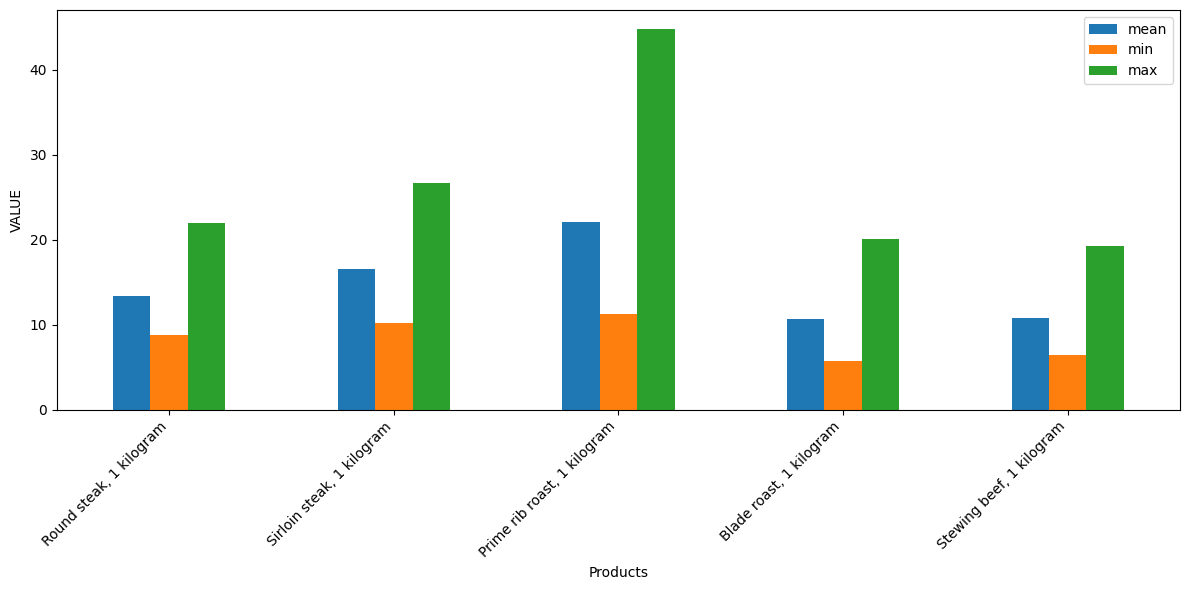

In [13]:
# Obtengo el orden de los productos según el conteo DE apAriciones 
orden = conteo_productos_3.index  

tablas_almenos3 = (
    df_num[df_num["Products"].isin(orden)]
    .groupby("Products", as_index=False)["VALUE"]
    .agg(min="min", mean="mean", max="max")
    .round(2)
)

# PA QUE SE VEA IGUAL a LA TABLA tengo que reordenar según el orden de 'orden'
tablas_almenos3 = (
    tablas_almenos3.set_index("Products")
    .reindex(orden)
    .reset_index()
)

# (escoger cuantos salen en la grafica)
topPaGraficar = 5
plot_df = tablas_almenos3.head(topPaGraficar)

para_graficar = plot_df.set_index("Products")[["mean", "min", "max"]]

ax = para_graficar.plot(kind="bar", figsize=(12, 6))  # barras agrupadas automático
ax.set_ylabel("VALUE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
